In [1]:
#svm_model.ipynb
#
#by Joe Hahn
#joe.hahn@oracle.com
#5 July 2018
#
#train svm model

In [2]:
#set system parameters
N_dots = 6000
x_half_width = 0.5
radius = 3.5
box_half_width = 7.1
jitter = 1.0
rn_seed = 13
initial_id = 0

In [3]:
#generate training data
import numpy as np
rn_state = np.random.RandomState(seed=rn_seed)
from helper_fns import *
train = make_xo_df(N_dots, initial_id, x_half_width, radius, box_half_width, jitter)
train.tail()

,id,x,y,r,angle,class,X_score,O_score,B_score
record,,,,,,,,,
5995,5995,-1.682713,-0.567497,1.775831,-2.816320,O,0.0,1.0,0.0
5996,5996,-4.474410,4.172532,6.118036,2.391092,B,0.0,0.0,1.0
5997,5997,4.430881,3.801919,5.838432,0.709149,B,0.0,0.0,1.0
5998,5998,2.202746,7.988680,8.286802,1.301748,B,0.0,0.0,1.0
5999,5999,1.956030,1.377991,2.392679,0.613729,X,1.0,0.0,0.0


In [4]:
#prep plots
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(font_scale=1.5, font='DejaVu Sans')

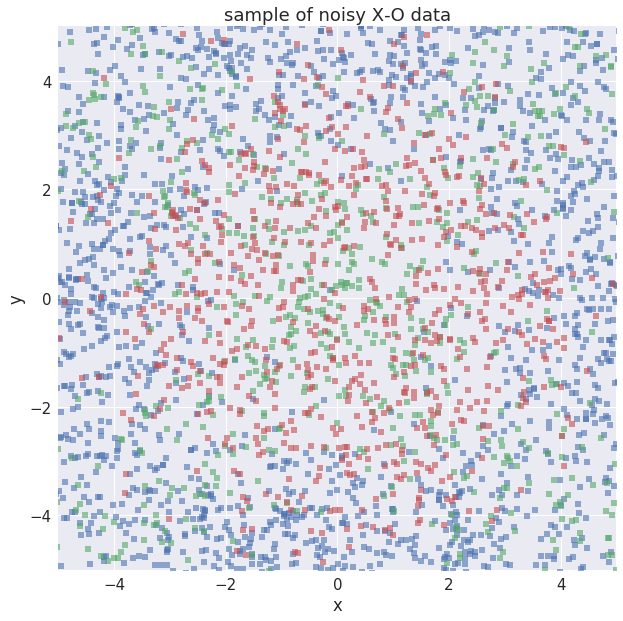

In [5]:
#scatterplot of a sample of noisy training data
N_plot = 6000#20000
df = train.sample(N_plot)
xy_rng = (-5, 5)
sz = 30
f, ax = plt.subplots(figsize=(10,10))
lbl = 'B'
idx = (df['class'] == lbl)
xp = df[idx].x
yp = df[idx].y
p = sns.regplot(xp, yp, ax=ax, fit_reg=False, scatter_kws={'alpha':0.6, 's': sz}, marker='s', label=lbl)
lbl = 'X'
idx = (df['class'] == lbl)
xp = df[idx].x
yp = df[idx].y
p = sns.regplot(xp, yp, ax=ax, fit_reg=False, scatter_kws={'alpha':0.6, 's': sz}, marker='s', label=lbl)
lbl = 'O'
idx = (df['class'] == lbl)
xp = df[idx].x
yp = df[idx].y
p = sns.regplot(xp, yp, ax=ax, fit_reg=False, scatter_kws={'alpha':0.6, 's': sz}, marker='s', label=lbl)
p = ax.set_title('sample of noisy X-O data')
p = ax.set_xlabel('x')
p = ax.set_ylabel('y')
p = ax.set_xlim(xy_rng)
p = ax.set_ylim(xy_rng)
plt.savefig('figs/training_data.png')

In [6]:
#check class balance
cols = ['id', 'class']
N = train[cols].groupby('class').count().sort_values('id')
N['relative_num'] = N*1.0/N.min()
N

,id,relative_num
class,,
X,765,1.000000
O,780,1.019608
B,4455,5.823529


In [7]:
#get features x and target variable y
x_cols = ['x', 'y']
y_col = 'class'
x = df[x_cols]
y = df[y_col]

In [8]:
#prep grid-search across hyperparameters
from sklearn.svm import SVC
model = SVC(kernel='rbf')
from sklearn.model_selection import GridSearchCV
Cs = [1.0e-2, 1.0, 1.0e2]
gammas = [1.0e-2, 1.0, 1.0e2]
hperparameters = {'C':Cs, 'gamma':gammas}
#fit grid of models to training data
models_fits = GridSearchCV(model, hperparameters, n_jobs=1).fit(x, y)

In [9]:
models_fits.cv_results_

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([0.40838734, 0.46559207, 0.7766877 , 0.31894533, 0.81754033,
        1.03859639, 0.42567197, 2.34820843, 1.17121077]),
 'mean_score_time': array([0.12808998, 0.1214629 , 0.18816797, 0.08296299, 0.12528809,
        0.19268537, 0.08207838, 0.09788521, 0.19192068]),
 'mean_test_score': array([0.7425    , 0.7425    , 0.7425    , 0.80383333, 0.805     ,
        0.7455    , 0.80383333, 0.788     , 0.73833333]),
 'mean_train_score': array([0.7425    , 0.7425    , 0.7425    , 0.80508333, 0.8175    ,
        0.95191667, 0.80466667, 0.83458333, 0.99908333]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, 1.0, 1.0, 1.0, 100.0, 100.0, 100.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.01, 1.0, 100.0, 0.01, 1.0, 100.0, 0.01, 1.0, 100.0],
              mask=[False, False, False, False, False, False, False, False,
             

In [10]:
#GridSearchCV?